In [0]:
# LOAD FILE
from google.colab import files
import pandas as pd
import io

train = pd.read_csv('./olid-training-v1.0.tsv', sep='\t')
tweet = train['tweet'].values.tolist()
train_label = train['subtask_a'].values.tolist()

test = pd.read_csv('./testset-levela.tsv', sep='\t')
testData = test['tweet'].values.tolist()

labels =pd.read_csv('./labels-levela.csv', header=None)
test_label = labels[1].values.tolist()

Convert NOT to 1 and OFF to 0

In [0]:
train_label = list(map(lambda x:0 if x=='OFF' else x,train_label))
train_label = list(map(lambda x:1 if x=='NOT' else x,train_label))

test_label = list(map(lambda x:0 if x=='OFF' else x,test_label))
test_label = list(map(lambda x:1 if x=='NOT' else x,test_label))

In [304]:
print(len(train_label))

13240


In [305]:
print(len(tweet))

13240


In [306]:
print(tweet)

['@USER She should ask a few native Americans what their take on this is.', '@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL', 'Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT', '@USER Someone should\'veTaken" this piece of shit to a volcano. 😂"', '@USER @USER Obama wanted liberals &amp; illegals to move into red states', '@USER Liberals are all Kookoo !!!', '@USER @USER Oh noes! Tough shit.', '@USER was literally just talking about this lol all mass shootings like that have been set ups. it’s propaganda used to divide us on major issues like gun control and terrorism', '@USER Buy more icecream!!!', '@USER Canada doesn’t need another CUCK! We already have enough #LooneyLeft #Liberals f**king up our great country! #Qproofs #TrudeauMustGo', '@USER @USER @USER It’s not my fault you support gun control', '@USER What’s the difference betw

TASK: Write code to remove special characters, empty strings, digits and
stopwords from the sentences and put all the words into lower cases.

In [307]:
import nltk
nltk.download('punkt')
nltk.download('gutenberg')
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

def corpus(train):
  # empty list
  train2 = []
  for a in train:
    #Lowercase
    a = a.lower()
    #Special char  
    exclude = set(string.punctuation)
    a = ''.join(i for i in a if i not in exclude)
    # remove emoji
    RE_EMOJI = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    a = RE_EMOJI.sub(r'', a)
    # Digits
    a = re.sub(r'\d+', '', a)
    # Stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(a)
    a = [i for i in tokens if (not i in stop_words) and (not i == '')]

    if a != []:
      train2.append(' '.join(a))

  return train2


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [308]:
print(corpus(tweet))

['user ask native americans take', 'user user go home ’ drunk user maga trump 🇺🇸 url', 'amazon investigating chinese employees selling internal data thirdparty sellers looking edge competitive marketplace url amazon maga kag china tcot', 'user someone shouldvetaken piece shit volcano', 'user user obama wanted liberals amp illegals move red states', 'user liberals kookoo', 'user user oh noes tough shit', 'user literally talking lol mass shootings like set ups ’ propaganda used divide us major issues like gun control terrorism', 'user buy icecream', 'user canada ’ need another cuck already enough looneyleft liberals fking great country qproofs trudeaumustgo', 'user user user ’ fault support gun control', 'user ’ difference kavanaugh user one men admitted groping year old girl years ago going confirmed scj demsarefrauds demsaredone walkawaydemocrats redwave voteredsaveamerica trumptrain maga url', 'user lying corrupt traitor nobody wants hear anymore lies deepstatecorruption url', 'user u


Creating the Corpus Vocabulary and Preparing the Dataset.

In [0]:
#Train Data
from keras.preprocessing.text import Tokenizer
a =  corpus(tweet)
# Create Tokenizer
t = Tokenizer()
# fit tokenizer on documents
t.fit_on_texts(a)

#word2ind
word2idx = t.word_index

# Train_data
train_data = []
for i in a:
    #print(i)
    temp = i.split()
    train_data.append([word2idx[x] for x in temp])


In [310]:
print(train_data)

[[1, 268, 2465, 192, 50], [1, 1, 25, 214, 2, 823, 1, 9, 13, 245, 3], [3425, 6131, 1702, 2265, 1612, 4842, 1281, 8770, 8771, 193, 3426, 3427, 4843, 3, 3425, 9, 239, 735, 400], [1, 103, 8772, 540, 29, 8773], [1, 1, 148, 355, 4, 14, 1053, 473, 412, 514], [1, 4, 8774], [1, 1, 113, 8775, 1220, 29], [1, 420, 168, 72, 566, 689, 8, 603, 4844, 2, 882, 194, 1797, 22, 952, 484, 8, 5, 6, 2466], [1, 567, 8776], [1, 372, 2, 26, 67, 6132, 150, 149, 8777, 4, 8778, 59, 57, 8779, 6133], [1, 1, 1, 2, 708, 80, 5, 6], [1, 2, 709, 61, 1, 15, 280, 2266, 3428, 158, 123, 251, 68, 240, 30, 883, 6134, 8780, 8781, 4026, 1703, 8782, 1054, 9, 3], [1, 155, 421, 1357, 585, 225, 305, 651, 222, 4027, 3], [1, 1, 1, 1613, 82, 160, 365, 6135, 3429, 6136], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8783, 8, 8, 6137, 169, 1518], [1, 49, 1798, 4028], [9, 1, 4029, 8, 15, 1165, 422, 33, 8, 1358, 28, 445, 422, 45, 232,

In [0]:
#Test Data
from keras.preprocessing.text import Tokenizer
a2 =  corpus(testData)

# Train_data
test_data = []
for i in a2:
    #print(i)
    temp = i.split()
    test_data.append([word2idx[x] if word2idx.get(x) else 2 for x in temp])


In [312]:
print(test_data)

[[2, 2, 2, 2, 47, 80, 7, 889, 5436, 1035, 2437, 7149, 328, 9012, 2774, 1472, 646, 2, 279, 820, 2, 1423, 2341, 271, 252, 5226, 3], [2447, 2, 10, 2247, 2, 24, 203], [2414, 219, 9, 500, 13, 2, 5128, 18826, 2172, 1, 1, 1, 1, 1, 2, 10894, 1498, 4, 1, 1, 9985, 1, 107, 8392, 1230, 3], [373, 15667, 105, 145, 41, 18274, 75, 187, 1887, 2, 2, 5947, 3], [2, 4139, 5034, 4616, 2838, 1012, 2003, 7, 4060, 1437, 149, 149, 3], [92, 23], [2147, 871, 1843, 194, 2420, 6662, 2, 2578, 859, 673, 865, 962, 8, 1994, 1173, 2, 139, 40, 657, 19491, 2337, 12, 1, 769, 13687, 1319], [1, 12, 678, 3957, 1, 354, 2, 1026], [14575, 2, 2486, 1991, 1435, 3, 1, 2, 2, 3], [2, 15551, 5298, 30, 107, 1883, 428], [10, 53, 471, 16572, 501, 997, 3], [2, 2, 37, 750, 473, 1204, 943, 890, 3437, 301, 6152, 2, 580, 2567, 874, 1091, 224, 3353, 792, 31, 23, 988, 834], [2, 265, 2441, 10], [1637, 252, 3887, 271, 2, 2809, 27, 477, 2, 517, 487, 3, 3], [1, 720, 2, 1933, 3671], [2710, 299, 8, 348, 232, 3], [2, 489, 4864, 460, 402, 2, 8865, 136,

 Readying the Inputs for the LSTM

In [313]:
import keras
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 40

print('Length of sample train_data before preprocessing:', len(train_data[0]))

word_index = {k:(v+3) for k,v in word2idx.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  
word_index["<UNUSED>"] = 3

train_data_after = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=MAXIMUM_LENGTH)

print('Length of sample train_data after preprocessing:', len(train_data_after[0]))

Length of sample train_data before preprocessing: 5
Length of sample train_data after preprocessing: 40


Building the Model

In [365]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dot, Input
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import plot_model

VOCAB_SIZE = len(word2idx)+1
EMBED_SIZE = 100  #FIXED 
units = 100

InputLayer = Input(shape=(MAXIMUM_LENGTH,), dtype='int32')
Embed = Embedding(VOCAB_SIZE , EMBED_SIZE, input_length=MAXIMUM_LENGTH)(InputLayer)
LSTM = LSTM(units, activation='tanh', recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True)(Embed)
dense = Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer='glorot_uniform')(LSTM)
model = Model(inputs=[InputLayer], outputs=[dense])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 40)                0         
_________________________________________________________________
embedding_30 (Embedding)     (None, 40, 100)           2027900   
_________________________________________________________________
lstm_30 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 101       
Total params: 2,108,401
Trainable params: 2,108,401
Non-trainable params: 0
_________________________________________________________________
None


Visualizing the model Structure

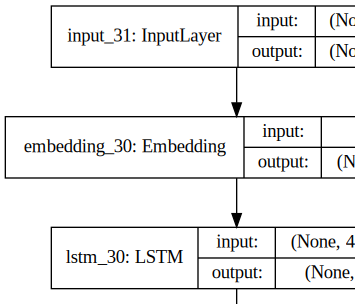

In [366]:
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

Training the Model

In [367]:
import numpy as np 
import matplotlib.pyplot as plt


BATCH_SIZE = 50
EPOCHS =3

train_val = np.array(train_data_after[:3000])
train_d = np.array(train_data_after[3000:])

label_val = np.array(train_label[:3000])
train_l = np.array(train_label[3000:])

#History
history = model.fit(train_d, train_l, epochs=EPOCHS , batch_size=BATCH_SIZE,validation_data=(train_val, label_val))


Train on 10240 samples, validate on 3000 samples
Epoch 1/3
10240/10240 [==============================] - 23s 2ms/step - loss: 0.6081 - acc: 0.6857 - val_loss: 0.5594 - val_acc: 0.7317
Epoch 2/3
10240/10240 [==============================] - 17s 2ms/step - loss: 0.4050 - acc: 0.8325 - val_loss: 0.5306 - val_acc: 0.7460
Epoch 3/3
10240/10240 [==============================] - 17s 2ms/step - loss: 0.2530 - acc: 0.9070 - val_loss: 0.5978 - val_acc: 0.7427


Using model.fit().history, plot the training and validation accuracy across the epochs

In [0]:
# PLot using model.fir().history
def plot(history):
  history_dict = history.history
  #print(history_dict.keys())

  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

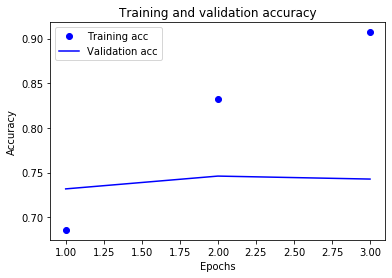

In [369]:
plot(history)

Evaluating the Model on the Test Data

In [370]:
test_data_after = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=MAXIMUM_LENGTH)

results = model.evaluate(test_data_after, test_label)
print('test_loss:', results[0], 'test_accuracy:', results[1])

860/860 [==============================] - 0s 361us/step
test_loss: 0.505951326808264 test_accuracy: 0.789534884552623
